Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'XLM'
against_currency = 'USD'

start = dt.datetime(2014,1,1)
end = dt.datetime.now()

base_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,0.003128,0.002928,0.002988,0.003072,118073.0,0.003072
2014-09-17,0.003768,0.003055,0.003081,0.003456,205474.0,0.003456
2014-09-18,0.004026,0.003160,0.003460,0.003872,204649.0,0.003872
2014-09-19,0.004304,0.003309,0.003936,0.003612,186971.0,0.003612
2014-09-20,0.003862,0.003296,0.003610,0.003464,145626.0,0.003464
...,...,...,...,...,...,...
2021-06-16,0.330104,0.311118,0.317828,0.317561,697753372.0,0.317561
2021-06-17,0.318640,0.285911,0.317944,0.297656,507029821.0,0.297656
2021-06-18,0.306870,0.289823,0.297742,0.290799,375747048.0,0.290799


In [3]:
base_df['Spread'] = base_df.High - base_df.Low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2466 entries, 2014-09-16 to 2021-06-22
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2466 non-null   float64
 1   Low        2466 non-null   float64
 2   Open       2466 non-null   float64
 3   Close      2466 non-null   float64
 4   Volume     2466 non-null   float64
 5   Adj Close  2466 non-null   float64
 6   Spread     2466 non-null   float64
dtypes: float64(7)
memory usage: 154.1 KB


## Plot the closing value of Stellar over time

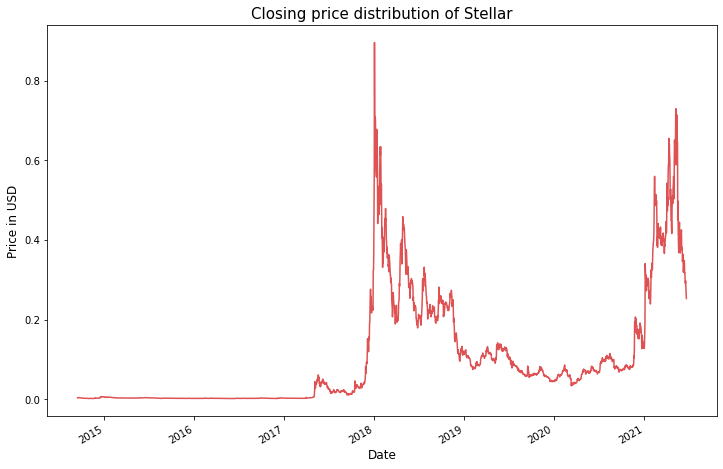

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.Close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of Stellar", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#base_df['Date_mpl'] = base_df['Date'].apply(lambda x: mdates.date2num(x))

temp_base_df = base_df.copy(deep=False)
#temp_base_df = temp_base_df.set_index(['Date'])
temp_base_df = temp_base_df.drop(['Spread'], axis=1)
temp_base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,0.003128,0.002928,0.002988,0.003072,118073.0,0.003072
2014-09-17,0.003768,0.003055,0.003081,0.003456,205474.0,0.003456
2014-09-18,0.004026,0.003160,0.003460,0.003872,204649.0,0.003872
2014-09-19,0.004304,0.003309,0.003936,0.003612,186971.0,0.003612
2014-09-20,0.003862,0.003296,0.003610,0.003464,145626.0,0.003464
...,...,...,...,...,...,...
2021-06-16,0.330104,0.311118,0.317828,0.317561,697753372.0,0.317561
2021-06-17,0.318640,0.285911,0.317944,0.297656,507029821.0,0.297656
2021-06-18,0.306870,0.289823,0.297742,0.290799,375747048.0,0.290799


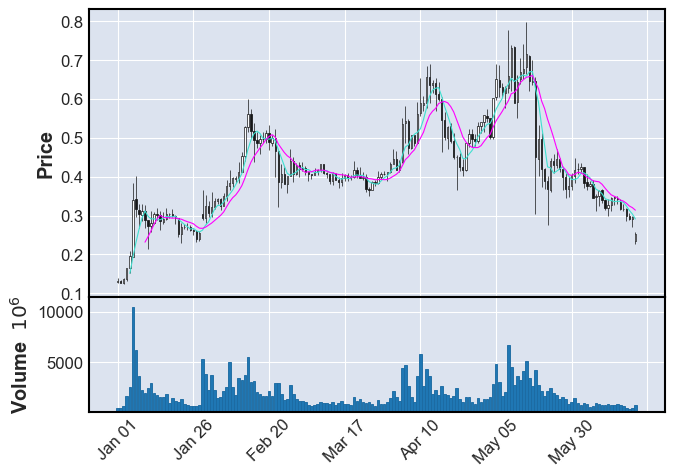

In [6]:
mpf.plot(temp_base_df.loc['2021-1-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
price_predict_df = base_df['Close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2021-1-1']
price_predict_df

,ds,y
2295,2021-01-02,0.127820
2296,2021-01-03,0.136423
2297,2021-01-04,0.165180
2298,2021-01-05,0.194823
2299,2021-01-06,0.340793
...,...,...
2461,2021-06-16,0.317561
2462,2021-06-17,0.297656
2463,2021-06-18,0.290799
2464,2021-06-19,0.297630


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
172,2021-06-25,0.208450,0.160033,0.260496
173,2021-06-26,0.207038,0.152576,0.262483
174,2021-06-27,0.198328,0.142836,0.254936
175,2021-06-28,0.194730,0.139720,0.255135
176,2021-06-29,0.169767,0.112350,0.236693


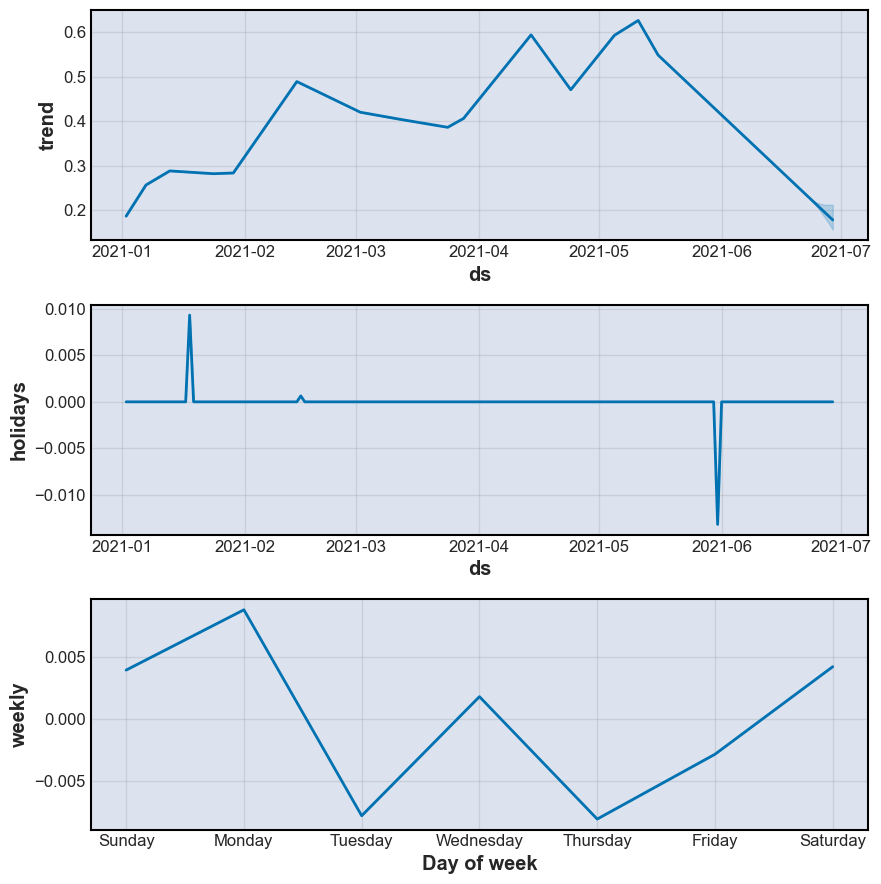

In [9]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=7)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

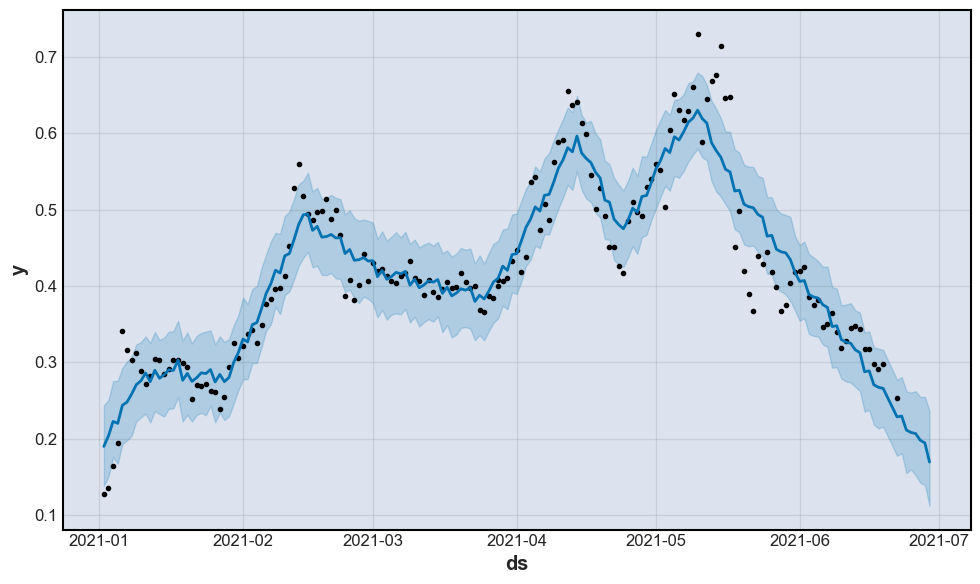

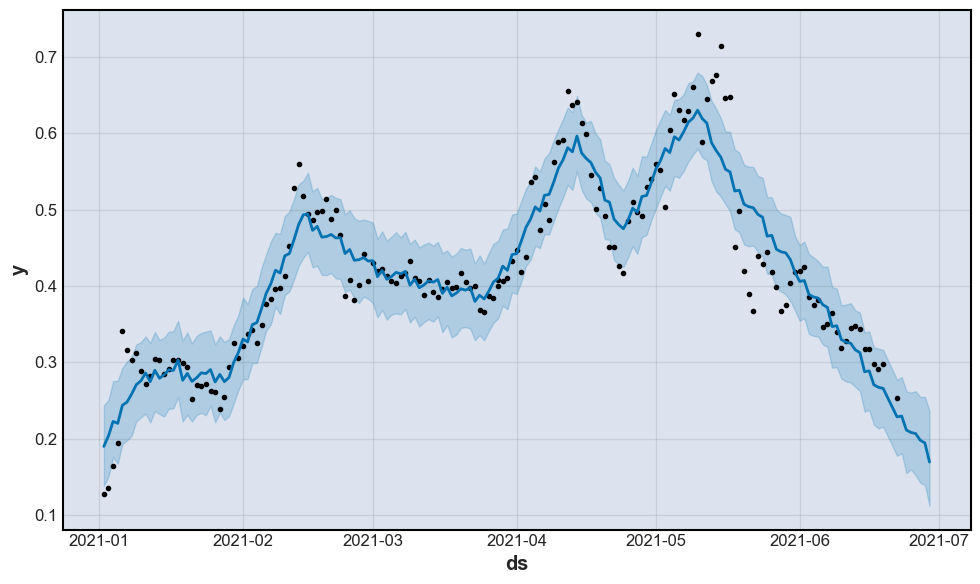

In [10]:
m.plot(forecast)